In [1]:
#LOGISTIC REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
y_binary = (y > np.median(y)).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 73.03%
Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



   Size   Price
0  1500  300000
1  1600  310000
2  1700  360000
3  1800  350000
4  1900  390000
5  2000  400000
6  2100  420000
7  2200  430000
8  2300  480000
9  2400  470000


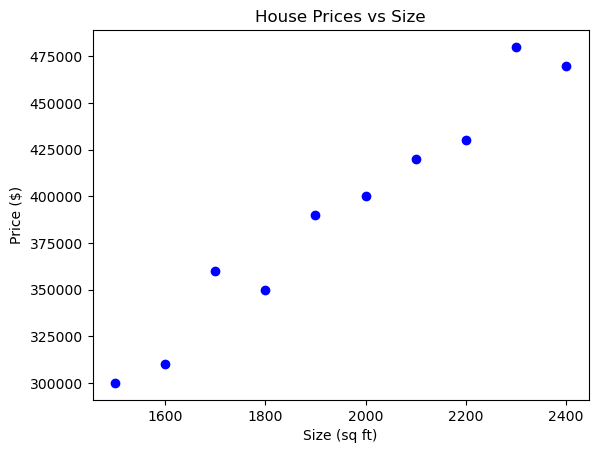

Mean Squared Error: 493200059.4530322
R^2 Score: 0.9317370159926599


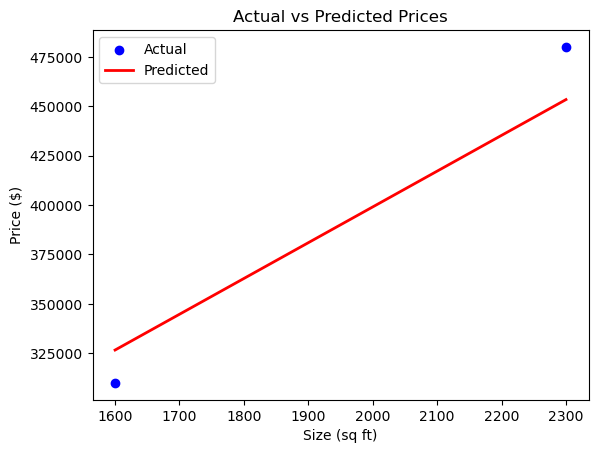

In [3]:
#LINEAR REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Size': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
    'Price': [300000, 310000, 360000, 350000, 390000, 400000, 420000, 430000, 480000, 470000]
}
#print(data)
# Convert to DataFrame
df = pd.DataFrame(data)
print(df)

#plot the data
plt.scatter(df['Size'], df['Price'], color='blue')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('House Prices vs Size')
plt.show()

from sklearn.model_selection import train_test_split
X = df[['Size']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the Linear Regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#Make Predictions
y_pred = model.predict(X_test)

#Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

#Visualize the Regression Line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563

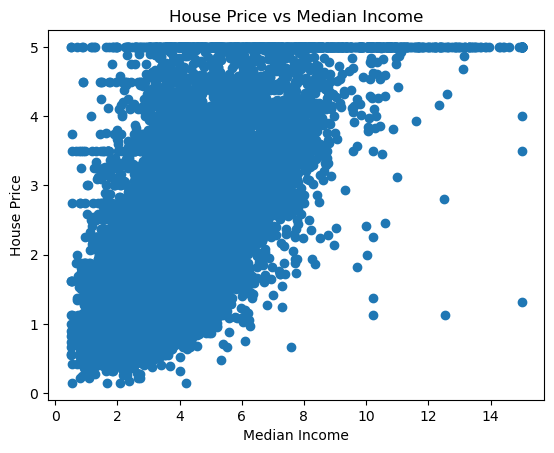

Mean Squared Error: 0.7091157771765549
R^2 Score: 0.45885918903846656


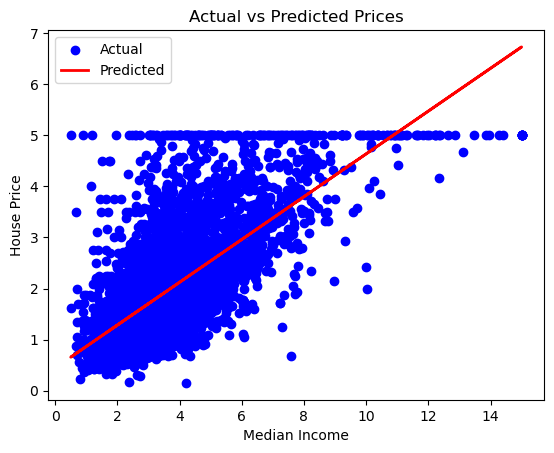

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing # Use California housing dataset instead

# Load the California housing dataset
housing = fetch_california_housing()
# Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Explore the data
print(df.head())
print(df.describe())
print(df.corr())

# Visualize the data (example - you might want to choose different features)
plt.scatter(df['MedInc'], df['PRICE'])
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('House Price vs Median Income')
plt.show()

# Split the data
X = df[['MedInc']]  # Use Median Income as a predictor (example)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income') # Adjust label accordingly
plt.ylabel('House Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()